## Credit Default Risk 



In [ ]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Listing our dataset

files = os.listdir('./dataset')
print(*files, sep='\n')

application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
HomeCredit_columns_description.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
sample_submission.csv


In [ ]:
# Training data

training_data = pd.read_csv('./dataset/application_train.csv')
print('Training data has {} (differet loans) and {} features.'.format(training_data.shape[0], training_data.shape[0]))
training_data.head()

Training data has 307511 (differet loans) and 307511 features.


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Testing data

testing_data = pd.read_csv('./dataset/application_test.csv')
print('Tesing data has {} (differet loans) and {} features.'.format(testing_data.shape[0], testing_data.shape[0]))
testing_data.head()

Tesing data has 48744 (differet loans) and 48744 features.


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### EDA (Exploratory data analysis):

Analysing data, trends, anomalies, distributions. That analysis gives up insight in which data is relevant - which getures to use.

TARGET Column traing data - default rate distribution:
0    282686
1     24825
Name: TARGET, dtype: int64


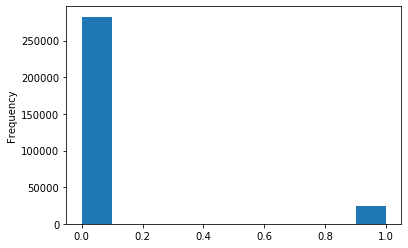

In [ ]:
# Distribution of TARGET column

print('TARGET Column traing data - default rate distribution:')
print(training_data['TARGET'].value_counts())
training_data['TARGET'].astype('int').plot.hist()

In [ ]:
# Missing values statistics
def missing_values_per_column(dataframe):
    # number missing values for each column in given dataframe 
    number_of_total_missing_values = dataframe.isnull().sum()
    
    # percentage of missing values for each column in given dataframe 
    percentage_of_total_missing_values = dataframe.isnull().sum()/len(dataframe)*100
    
    # creating a table to display the missing values results
    missing_values_table = pd.concat([number_of_total_missing_values, percentage_of_total_missing_values], axis=1)
    missing_values_table = missing_values_table.rename(columns={0: 'Number of missing values', 1: '% of Total values'})
    
    # filtering only columns that have missing values
    missing_values_table = missing_values_table[missing_values_table.iloc[:, 1] != 0]
    
    # sorting them by descending order
    missing_values_table = missing_values_table.sort_values(by=['% of Total values'], ascending=False)
    
    return missing_values_table

missing_values = missing_values_per_column(training_data)
missing_values.head(10)

,Number of missing values,% of Total values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [ ]:
# Checking the date type of columns
training_set_data_types = training_data.dtypes.value_counts()
print(training_set_data_types)

float64    65
int64      41
object     16
dtype: int64


In [ ]:
# Columns that have 'object' data type are categorical features
print('Number of categories in each categorical feature')
training_data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Number of categories in each categorical feature


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
# For categorical data having 2 unique categories we use LabelEncoder, and for the others one-hot encoder - pandas's get_dummies function
# get_dummies to create dummy variable

label_encoder = LabelEncoder()
number_of_label_encoded_features = 0
label_encoded_features = []

for column in training_data:
    if training_data[column].dtype == 'object':
        if(len(list(training_data[column].unique()))) == 2:
            label_encoder.fit(training_data[column])
            
            training_data[column] = label_encoder.transform(training_data[column])
            testing_data[column] = label_encoder.transform(testing_data[column])
            
            label_encoded_features.append(column)
            number_of_label_encoded_features += 1
            
print(f'{number_of_label_encoded_features} categorical features were encoded via LabelEncoder:')
for column in label_encoded_features:
    print(column)

training_data = pd.get_dummies(training_data)
testing_data = pd.get_dummies(testing_data)

3 categorical features were encoded via LabelEncoder:
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY


In [ ]:
# Some categories were found in training dataset, that weren't found in testing dataset (because of one-hot encoding training set has more columns).
# We need to align training and testing datasets to have the same columns (remove the excess columns from training set) and keep only ccolumns that appear in borh datasets.

print('Before alignment')
print('Treaning features shape:', training_data.shape)
print('Testing features shape:', testing_data.shape)

# saving prediction classes for trainig set
training_data_pedictions = training_data['TARGET']

# aligning the data based on columns
training_data, testing_data = training_data.align(testing_data, join='inner', axis=1)

# restoring training predictions
training_data['TARGET'] = training_data_pedictions

print('After alignment')
print('Treaning features shape:', training_data.shape)
print('Testing features shape:', testing_data.shape)


Before alignment
Treaning features shape: (307511, 243)
Testing features shape: (48744, 239)
After alignment
Treaning features shape: (307511, 240)
Testing features shape: (48744, 239)


## Filtering out anomalies in our dataset

In [ ]:
(training_data['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


Text(0.5, 0, 'Years employed')

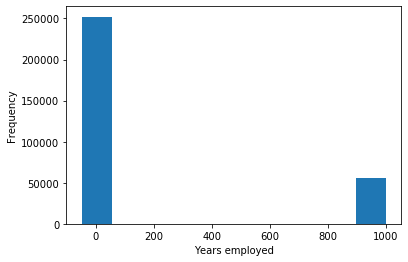

In [ ]:
print(training_data['DAYS_EMPLOYED'].describe())
(training_data['DAYS_EMPLOYED'] / 365).plot.hist('Years emplyed histogram')
plt.xlabel('Years employed')

In [ ]:
years_employed_annomalies = training_data[training_data['DAYS_EMPLOYED'] == 365243] 
years_employed_regular = training_data[training_data['DAYS_EMPLOYED'] != 365243]
print('Comparing default rata for anomalious and regular data:')
print('1. Default rate for anomalious  data = {:.2f}%'.format(years_employed_annomalies['TARGET'].mean() * 100))
print('2. Default rate for regular data = {:.2f}%'.format(years_employed_regular['TARGET'].mean() * 100))

Comparing default rata for anomalious and regular data:
1. Default rate for anomalious  data = 5.40%
2. Default rate for regular data = 8.66%


Text(0.5, 0, 'Days employed')

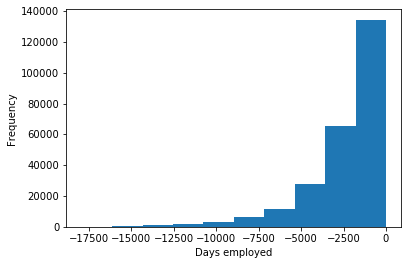

In [ ]:
# DAYS_EMPLOYED anomalies have importance so we keep but by replacing the value with nan and creating a new columns that srtates whwter an observation is anomaly

# creating a new flag column
training_data['DAYS_EMPLOYED_ANOM'] = training_data['DAYS_EMPLOYED'] == 365243

# replacing the column with nan
training_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

training_data['DAYS_EMPLOYED'].plot.hist('Days employment distribution')
plt.xlabel('Days employed')

In [ ]:
# Repeating the same process for DAYS_EMPLOYED column for test dataset


# creating a new flag column
testing_data['DAYS_EMPLOYED_ANOM'] = testing_data['DAYS_EMPLOYED'] == 365243

# replacing the column with nan
testing_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('Number of DAYS_EMPLOYED anomalies in test set is {} of total {} observations.'.format(testing_data['DAYS_EMPLOYED_ANOM'].sum(), len(testing_data)))

Number of DAYS_EMPLOYED anomalies in test set is 9274 of total 48744 observations.


## Correlations

Looking at correlations between featres and target. It is not the greatest method to represent relevance, but gives better picture in understanding data.

Using dataframe's corr (Pearsons correlation):
- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”

In [ ]:
# Finding correlations between features and TARGET column

features_target_correlations = training_data.corr()['TARGET'].sort_values() # corr finds correlations for each column pair (matrix columns x columns)

print('Most correlated features with the TARGET column:\n', features_target_correlations.tail())
print('\n\nLeast correlated features with the TARGET column:\n', features_target_correlations.head())

Most correlated features with the TARGET column:
 REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


Least correlated features with the TARGET column:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
Name: TARGET, dtype: float64


Examining in more detail the highes correlated feature with the class outcome = DAYS_BIRTH column.
DAYS_BIRTH - Client's age in days at the time of application,time only relative to the application.

In [ ]:
training_data['DAYS_BIRTH'] = abs(training_data['DAYS_BIRTH'])
training_data['DAYS_BIRTH'].corr(training_data['TARGET'])

-0.07823930830982709

As the client gets older, the likelihood to default is lower (age increases, target column deacreases - tends to 0)

(array([ 4047.,  9632., 14006., 19105., 19732., 18692., 20243., 21503.,
        20566., 19790., 17688., 16651., 16042., 17502., 16807., 15843.,
        14846., 12839.,  8520.,  3457.]),
 array([20.51780822, 22.94794521, 25.37808219, 27.80821918, 30.23835616,
        32.66849315, 35.09863014, 37.52876712, 39.95890411, 42.3890411 ,
        44.81917808, 47.24931507, 49.67945205, 52.10958904, 54.53972603,
        56.96986301, 59.4       , 61.83013699, 64.26027397, 66.69041096,
        69.12054795]),
 <a list of 20 Patch objects>)

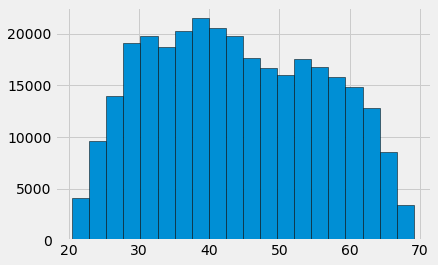

In [ ]:
# Distribution of age (histogram)

plt.style.use('fivethirtyeight')

plt.hist(training_data['DAYS_BIRTH']/365, edgecolor='k', bins=20)

Text(0.5, 1.0, 'Desity of Age (KDE)')

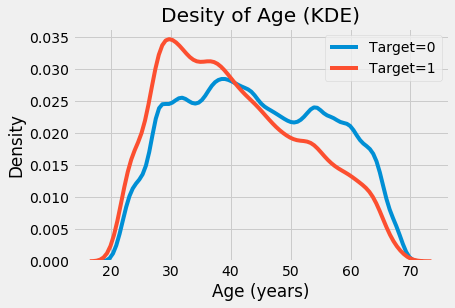

In [ ]:
# Distribution of age (density funcion)
# Using Kernel Density Estimation - KDE to calculate density

sns.kdeplot(training_data[training_data['TARGET'] == 0]['DAYS_BIRTH'] / 365, label='Target=0')
sns.kdeplot(training_data[training_data['TARGET'] == 1]['DAYS_BIRTH'] / 365, label='Target=1')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Desity of Age (KDE)')

In [ ]:
# Distribution of age, by age groups (to see the default rate by age groups)

age_data = training_data[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], np.linspace(20, 70, 11))
age_data.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [ ]:
# Grouping dataframe by binns

age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0, 0.5, 'Default rate %')

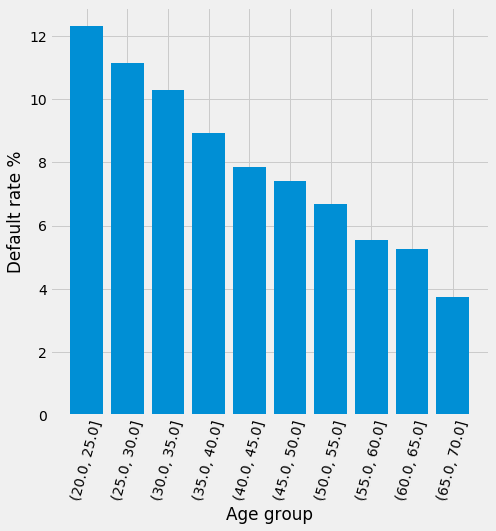

In [ ]:
# Plotting the age groups

plt.figure(figsize=(7, 7))

plt.bar(age_groups.index.astype(str), age_groups['TARGET']*100)

plt.xticks(rotation=75)
plt.xlabel('Age group')
plt.ylabel('Default rate %')

We continue then examining the most negative correlations:
- EXT_SOURCE_3 (Normalized score from external data source,normalized)
- EXT_SOURCE_2 (Normalized score from external data source,normalized)
- EXT_SOURCE_1 (Normalized score from external data source,normalized)
<br />
<br />
We assume that they are a credit scores obtained from varuious sources of data

In [ ]:
# Looking into the correlation of EXT_SOURCE columns

external_source_data = training_data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
external_source_data_correlations = external_source_data.corr()
external_source_data_correlations

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1, 'EXT_SOURCE correlation heatmap')

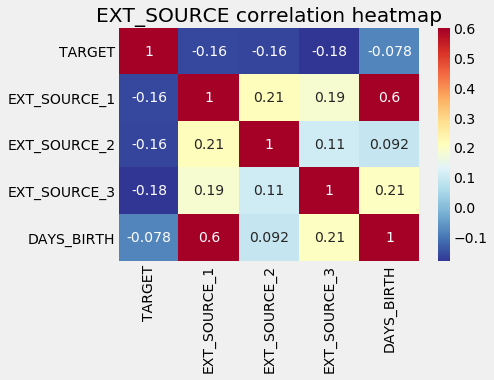

In [ ]:
sns.heatmap(external_source_data_correlations, cmap = plt.cm.RdYlBu_r, annot=True, vmax=0.6)
plt.title('EXT_SOURCE correlation heatmap')

All three EXT_SOURCE features are negatively correlated with TARGET column. That means the more the EXT_SOURCE increases (better credit score), the more TARGET decreases - becomes 0 (default rate drops).

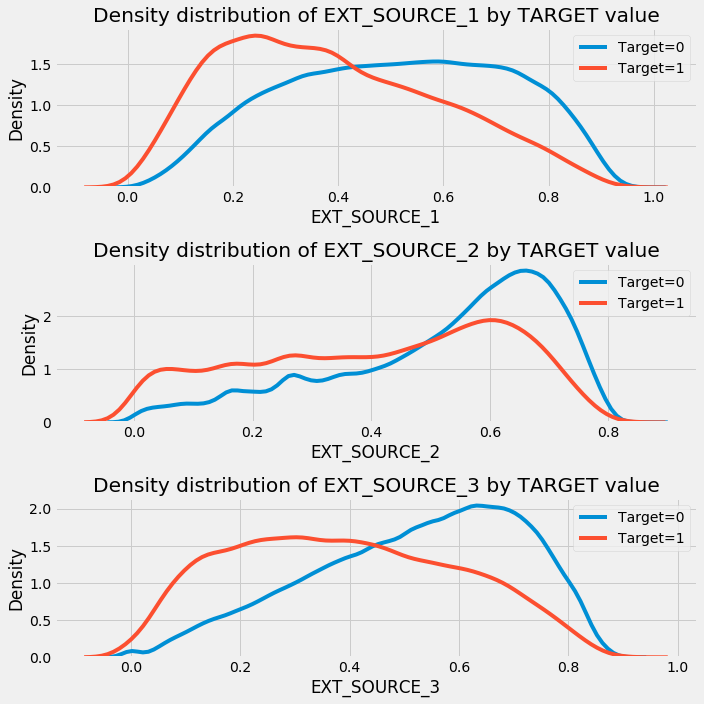

In [ ]:
# Distribution of EXT_SOURCE columns compared to TARGET column (density function - KDE)
# We visualize the effect of EXT_SOURCE on TARGET column 

plt.figure(figsize=(10, 10))

external_source_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

for i, column_name in enumerate(external_source_columns):
    plt.subplot(3, 1, i + 1)
    
    sns.kdeplot(external_source_data[external_source_data['TARGET'] == 0][column_name], label='Target=0')
    sns.kdeplot(external_source_data[external_source_data['TARGET'] == 1][column_name], label='Target=1')
    
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.title(f'Density distribution of {column_name} by TARGET value')    
    
plt.tight_layout()

All three EXT_SOURCE columns have very little, weak correlations. But the EX_SOURCE_3 has the biggest differance between distributions of a target values - the relationship to the likelyhood of repaying the loan. Its density distribution shows that observations who defaulted skews to the lower credit score and vice versa.

Number of observations without NaN values: 109589/307511


Text(0.5, 1.05, 'External source scores and years birth Pairs Plot')

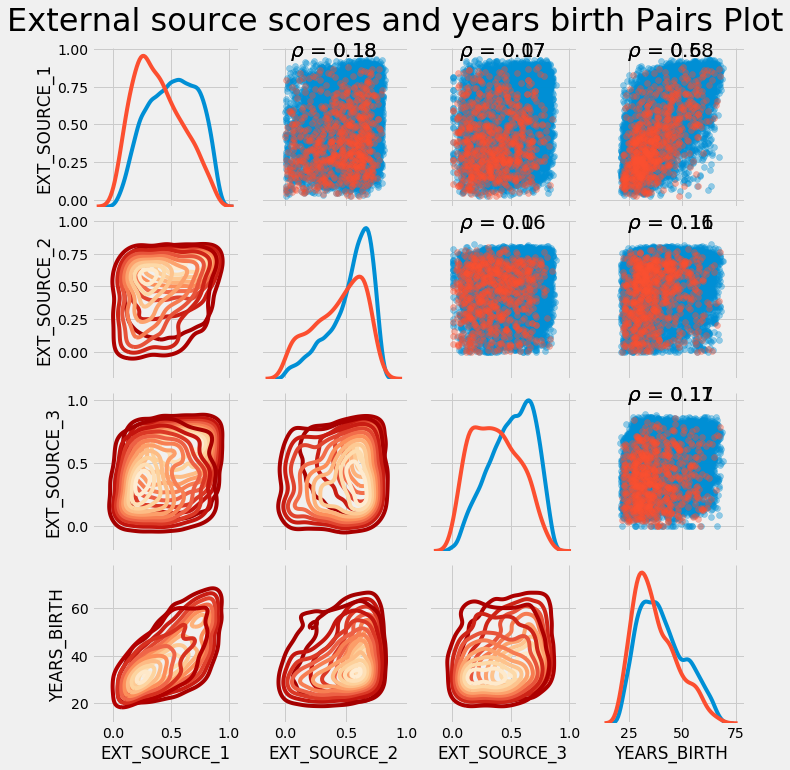

In [ ]:
# Plotting the pairs prot - correlation between columns and a density distribution of itself

# arranging data for plotting
pair_plot_data = external_source_data.drop(columns=['DAYS_BIRTH']).copy()
pair_plot_data['YEARS_BIRTH'] = training_data['DAYS_BIRTH']/365

# plot only portion of observations without NaN values
print(f'Number of observations without NaN values: {len(pair_plot_data.dropna())}/{len(pair_plot_data)}')
pair_plot_data = pair_plot_data.dropna()
pair_plot_data = pair_plot_data.iloc[:10000, :]

def correlation_between_features(feature1, feature2,**kwargs):
    correlation_coef_matrix = np.corrcoef(feature1, feature2) # correlation coeficient matrix
    r = correlation_coef_matrix[0][1]    
    
    label = r'$\rho$ = ' + str(round(r, 2))
    
    # getting current axces and adding the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
#correlation_between_features(pair_plot_data['YEARS_BIRTH'], pair_plot_data['EXT_SOURCE_3'])

# Plotting the pair plot
grid = sns.PairGrid(pair_plot_data, 
                    hue='TARGET',
                    diag_sharey=False,
                    vars=[column for column in list(pair_plot_data.columns) if column != 'TARGET']
                   )
grid.map_upper(plt.scatter, alpha = 0.4)
grid.map_upper(correlation_between_features)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)
plt.suptitle('External source scores and years birth Pairs Plot', size = 32, y = 1.05)

Blues represent loadns payed on time and reds represent defaulted loans. We can see a high correlation between year of birth (YEARS_BIRTH) and credit score 1 (EXT_SOURCE_1), meaning that probaly that credit score 1 feature probably is taking age into the calculation.

## Feature engineering

### Polynomial features

In [ ]:
# Creating polynomial features

# choosing the previous columns
polynomial_features_training = training_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
polynomial_features_training_target_column = training_data[['TARGET']]
polynomial_features_test = testing_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# fixing missing values
imputer = SimpleImputer(strategy='mean')

polynomial_features_training = imputer.fit_transform(polynomial_features_training)
polynomial_features_test = imputer.transform(polynomial_features_test)

In [ ]:
poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(polynomial_features_training)

print(f'Shape of original features = {polynomial_features_training.shape}')
polynomial_features_training = poly_transformer.transform(polynomial_features_training)
polynomial_features_test = poly_transformer.transform(polynomial_features_test)
print(f'Shape of polynomial features = {polynomial_features_training.shape}')

Shape of original features = (307511, 4)
Shape of polynomial features = (307511, 35)


In [ ]:
poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [ ]:
# Testing to see how are new features correlated to TARGET column
polynomial_features_training = pd.DataFrame(polynomial_features_training, columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
polynomial_features_training['TARGET'] = polynomial_features_training_target_column

In [ ]:
polynomial_features_training_correlations = polynomial_features_training.corr()['TARGET'].sort_values()

print('Most corelated polynomical features with the TARGET column:')
print(polynomial_features_training_correlations.head())

print('\nLeast corelated polynomical features with the TARGET column:')
print(polynomial_features_training_correlations.tail())

Most corelated polynomical features with the TARGET column:
EXT_SOURCE_2 EXT_SOURCE_3                -0.194235
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189593
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181417
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176589
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.171729
Name: TARGET, dtype: float64

Least corelated polynomical features with the TARGET column:
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


Several of newly created polynomical features have a higher correlation with the THARGET column than the original ones. Highest correlated original one was EXT_SOURCE_3 with the correlation of -0.18.
<br><br>
We will test both the original and polynomial features to see which perform better


In [ ]:
# Adding polynomial features to the original train and test data frames (to keep all features together in one place)

# Creating polynomical features for the testing set as well
polynomial_features_test = pd.DataFrame(polynomial_features_test, columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
polynomial_features_training['SK_ID_CURR'] = training_data['SK_ID_CURR']
training_data_polynomial = training_data.merge(polynomial_features_training, on = 'SK_ID_CURR', how = 'left', suffixes=('', '_y'))

# Merge polnomial features into testing dataframe
polynomial_features_test['SK_ID_CURR'] = testing_data['SK_ID_CURR']
testing_data_polynomial = testing_data.merge(polynomial_features_test, on = 'SK_ID_CURR', how = 'left', suffixes=('', '_y'))

# Align the dataframes
training_data_polynomial, testing_data_polynomial = training_data_polynomial.align(testing_data_polynomial, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', training_data.shape)
print('Testing data with polynomial features shape:  ', testing_data.shape)

Training data with polynomial features shape:  (307511, 241)
Testing data with polynomial features shape:   (48744, 240)


### Business/Domain knowledge

Creating new features from existing ones:
- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [ ]:
domain_traning_data = training_data.copy()
domain_testing_data = testing_data.copy() 

domain_traning_data['CREDIT_INCOME_PERCENT'] = domain_traning_data['AMT_CREDIT'] / domain_traning_data['AMT_INCOME_TOTAL']
domain_traning_data['ANNUITY_INCOME_PERCENT'] = domain_traning_data['AMT_ANNUITY'] / domain_traning_data['AMT_INCOME_TOTAL']
domain_traning_data['CREDIT_TERM'] = domain_traning_data['AMT_ANNUITY'] / domain_traning_data['AMT_CREDIT']
domain_traning_data['DAYS_EMPLOYED_PERCENT'] = domain_traning_data['DAYS_EMPLOYED'] / domain_traning_data['DAYS_BIRTH']

domain_testing_data['CREDIT_INCOME_PERCENT'] = domain_testing_data['AMT_CREDIT'] / domain_testing_data['AMT_INCOME_TOTAL']
domain_testing_data['ANNUITY_INCOME_PERCENT'] = domain_testing_data['AMT_ANNUITY'] / domain_testing_data['AMT_INCOME_TOTAL']
domain_testing_data['CREDIT_TERM'] = domain_testing_data['AMT_ANNUITY'] / domain_testing_data['AMT_CREDIT']
domain_testing_data['DAYS_EMPLOYED_PERCENT'] = domain_testing_data['DAYS_EMPLOYED'] / domain_testing_data['DAYS_BIRTH']

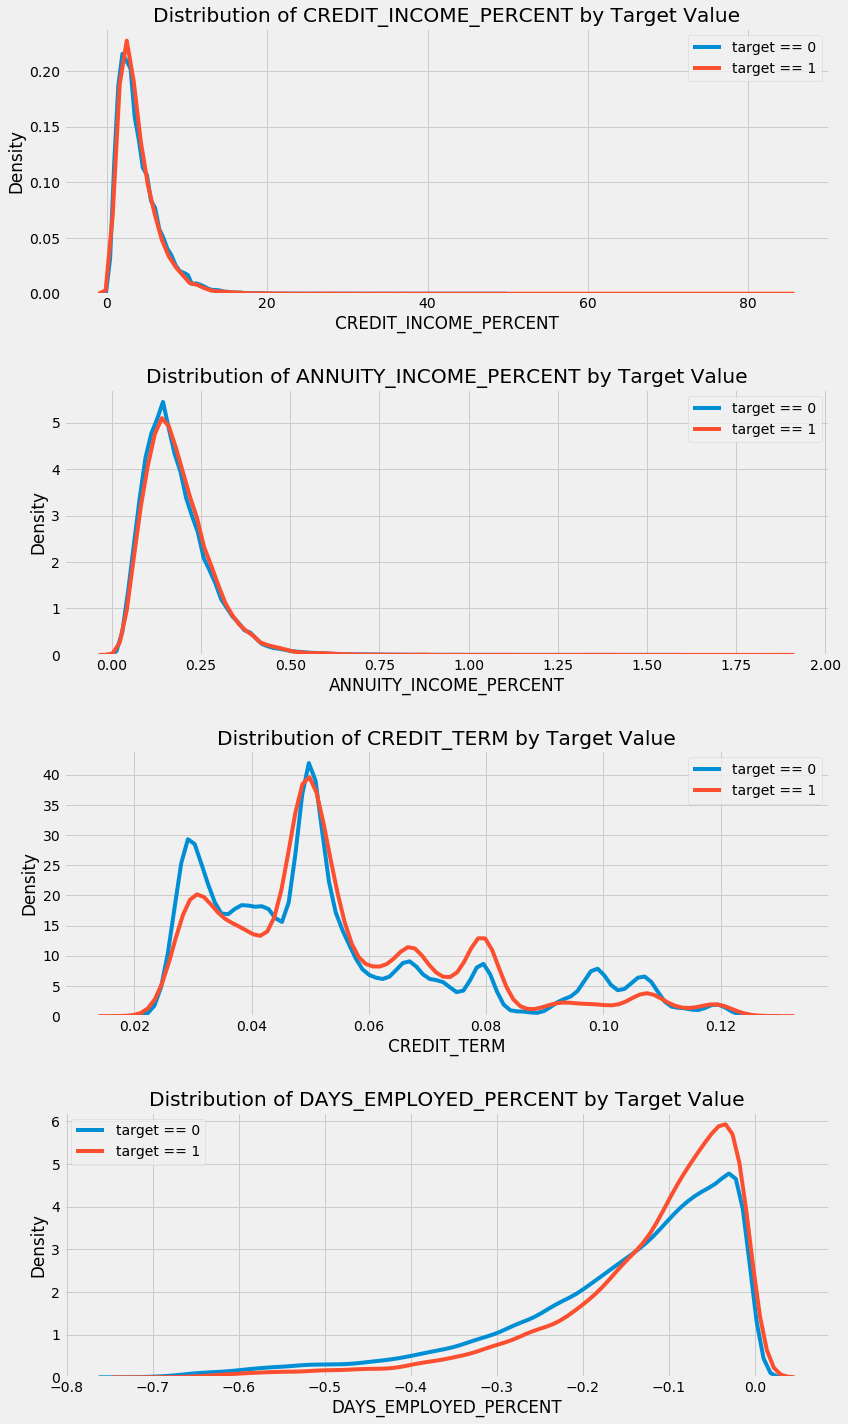

In [ ]:
# Density funciton distribution for new domain features

plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(domain_traning_data.loc[domain_traning_data['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(domain_traning_data.loc[domain_traning_data['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

## Building models

### 1. Logistic Regression

#### 1.1 Making a submission file

In [ ]:
from sklearn.preprocessing import MinMaxScaler

test = testing_data.copy()
if 'TARGET' in training_data:
    train = training_data.drop(columns = ['TARGET'])
else:
    train = training_data.copy()
    
feature_names = list(train.columns)

# Fixing missing values
imputer = SimpleImputer(strategy = 'median')
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

# Scaling features to the same scale
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [ ]:
# Training the Logistic Regression model

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C = 0.0001)
classifier.fit(train, training_data['TARGET'])

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the values
predictions = classifier.predict_proba(test)
predictions = predictions[:, 1] # first column if probability that a result is 0 and second that it is 1

# Saving results to a file
logistic_regression_results = testing_data[['SK_ID_CURR']]
logistic_regression_results['TARGET'] = predictions
logistic_regression_results.head()
logistic_regression_results.to_csv(r'results/logistic_regression_test_submission_file.csv', index=False)

#### 1.2 Using only train data to evaluate model performance (K-Fold)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=train, y=training_data['TARGET'], cv=10)
accuracies

array([0.91925728, 0.91925466, 0.91925466, 0.91925466, 0.91925466,
       0.91928718, 0.91928718, 0.91928718, 0.91928718, 0.91928718])

### 2. Random Forest

#### 2.1 Using traning set features

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
classifier.fit(train, training_data['TARGET'])

# Extract feature importances
feature_importance_values = classifier.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


In [ ]:
# Predicting the result
predictions = classifier.predict_proba(test)[:, 1]

# Saving predictions to the rusults file
random_forest_results = testing_data[['SK_ID_CURR']]
random_forest_results['TARGET'] = predictions
random_forest_results.to_csv('results/random_forest_training_set_features.csv', index = False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


#### 2.2 Using polynomial features

In [ ]:
# Preparing the data

polynomial_features_names = list(training_data_polynomial.columns)

# Fixing missing values
imputer = SimpleImputer(strategy = 'median')
polynomial_features_train = imputer.fit_transform(training_data_polynomial)
polynomial_features_test = imputer.transform(training_data_polynomial)

# Scaling to the same scale
scaler = MinMaxScaler(feature_range = (0, 1))
poly_features = scaler.fit_transform(polynomial_features_train)
poly_features_test = scaler.transform(polynomial_features_test)

In [ ]:
# Building a model
classifier = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
classifier.fit(poly_features, training_data['TARGET'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [ ]:
# Predicting values
classifier = random_forest_poly.predict_proba(poly_features_test)[:, 1]

# Saving result to a file
random_forest_polynomial_results = training_data[['SK_ID_CURR']]
random_forest_polynomial_results['TARGET'] = predictions
random_forest_polynomial_results.to_csv('results/random_forest_polynomial_results.csv', index = False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    9.4s finished


#### 2.3 Using domain/busines set

In [ ]:
# Preparing the data

app_train_domain = domain_traning_data.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Fixing the missing values
imputer = SimpleImputer(strategy = 'median')
domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(domain_testing_data)

# Scale the features
scaler = MinMaxScaler(feature_range = (0, 1))
domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

In [ ]:
# Bulding the model

classifier = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
classifier.fit(domain_features, training_data['TARGET'])

# Extract feature importances
feature_importance_values_domain = classifier.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished


In [ ]:
# Predicting the result
predictions = classifier.predict_proba(domain_features_test)[:, 1]

# Saving result to a file
random_forest_domain_results = testing_data[['SK_ID_CURR']]
random_forest_domain_results['TARGET'] = predictions
random_forest_domain_results.to_csv('results/random_domain_results.csv', index = False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


Visualising the feature importance for Random forest models. Which variables are most relevant. We check first the original features and then domain/business features.

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

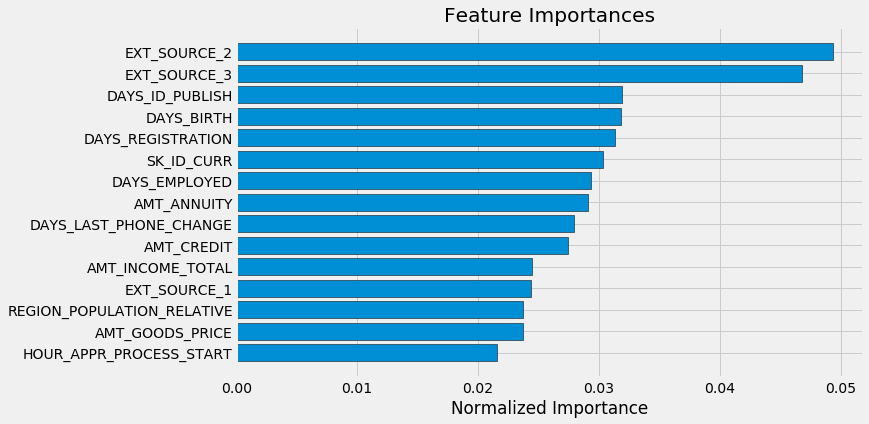

In [ ]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

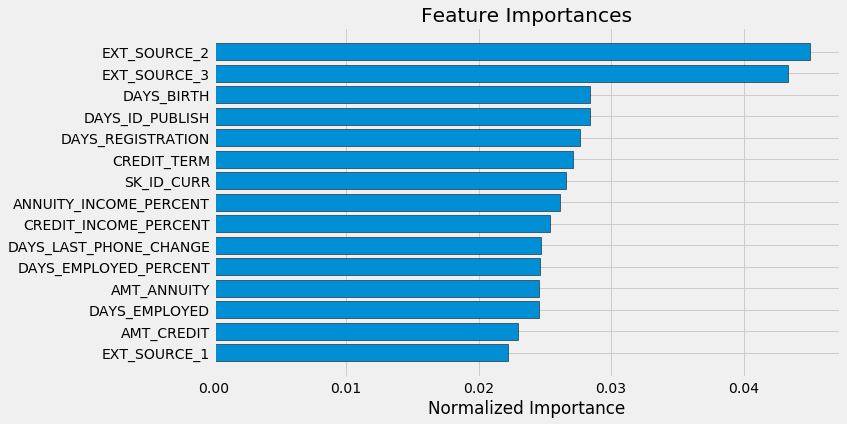

In [ ]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)